In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

import scipy as sp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
np.random.seed(42)

# Testing logistic regression for different discretized z resolutions

In [4]:
C = 1e-2
iterations = 1000

z_discs = np.arange(10, 110, 10)

f1s = []
accuracies = []

for z_disc in z_discs:
    filename_p = "pDisc_40000_"+"20x20x" + str(z_disc) + ".npz"
    filename_C = "CDisc_40000_"+"20x20x" + str(z_disc) + ".npz"
    p_data = sp.sparse.load_npz('../data/NO-tilt/wrong-detector-length/20x20xVaryingZ/'+filename_p)
    C_data = sp.sparse.load_npz('../data/NO-tilt/wrong-detector-length/20x20xVaryingZ/'+filename_C)
    full_data = sp.sparse.vstack([p_data, C_data], format='csr')
    
    p_labels = np.zeros((p_data.shape[0],))
    C_labels = np.ones((C_data.shape[0],))
    full_labels = np.hstack((p_labels, C_labels))
    
    X_train, X_test, y_train, y_test = train_test_split(full_data, full_labels, test_size=0.25, random_state=42)

    
    y_pred = LogisticRegression(C=C, max_iter=iterations).fit(X_train, y_train).predict(X_test)
    
    f1 = metrics.f1_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    f1s.append(f1)
    accuracies.append(accuracy)
    print("Complete for z_disc: " + str(z_disc) + " with accuracy score of: " + str(accuracy))

Complete for z_disc: 10 with accuracy score of: 0.9146542672866357
Complete for z_disc: 20 with accuracy score of: 0.9184040797960102
Complete for z_disc: 30 with accuracy score of: 0.9132543372831359
Complete for z_disc: 40 with accuracy score of: 0.9151042447877606
Complete for z_disc: 50 with accuracy score of: 0.9161541922903855
Complete for z_disc: 60 with accuracy score of: 0.9142042897855107
Complete for z_disc: 70 with accuracy score of: 0.9123043847807609
Complete for z_disc: 80 with accuracy score of: 0.9155042247887606
Complete for z_disc: 90 with accuracy score of: 0.9142542872856357
Complete for z_disc: 100 with accuracy score of: 0.9149042547872607


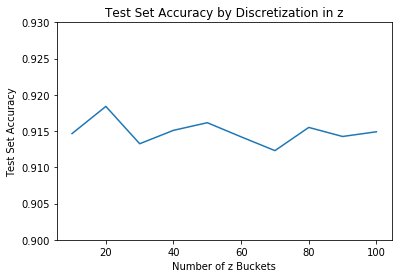

In [8]:
plt.plot(z_discs, accuracies)
        
plt.xlabel('Number of z Buckets')
plt.ylabel('Test Set Accuracy')
plt.title('Test Set Accuracy by Discretization in z')

plt.ylim(0.90, 0.93)

#plt.savefig('../plots/results/thesis/zdiscs-vs-acc.pdf')